In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train_ctrUa4K.csv")
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
cols=['Loan_ID']
df.drop(cols,axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = df.select_dtypes(include='object').columns
cols[1:]
for i in cols[1:]:
    le=LabelEncoder()
    for i in df:
        df[i]=le.fit_transform(df[i])
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,247,50,76,7,1,0,0
1,1,1,0,0,1,112,0,23,7,1,2,1
2,1,1,0,1,0,74,135,68,7,1,2,1
3,1,0,0,0,0,305,0,89,7,1,2,1
4,1,1,2,0,1,281,196,159,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,101,0,26,7,1,0,1
476,1,1,3,0,0,219,0,7,4,1,0,1
477,1,1,1,0,0,344,3,154,7,1,2,1
478,1,1,2,0,0,336,0,126,7,1,2,1


In [6]:
# x_test
X= df.drop('Loan_Status',axis=1)
y=df["Loan_Status"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, # Input data
 y, # output data
random_state=1234, # it se
 test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
from sklearn.model_selection import GridSearchCV,cross_val_score
log_params= [keys for keys in log_reg.get_params()]
param_grid = {
 'C' : [0.001, 0.01, 0.1, 1 ,10, 100],
 'penalty' : ['l1','l2'],
 'max_iter': [100,200,300]
}

In [10]:
param_grid


{'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'penalty': ['l1', 'l2'],
 'max_iter': [100, 200, 300]}

In [11]:
grid_search = GridSearchCV(log_reg,
 param_grid,
scoring='accuracy',
cv=5,
verbose=True)

In [12]:
grid_search


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=True)

In [13]:
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("best params:", best_params)
print("best train accuracy:",best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best params: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
best train accuracy: 0.7995215311004785


In [14]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [15]:
loan_df_test = pd.DataFrame(zip(cols,y_pred_log),
 columns=['Loan_ID','prediction'])
loan_df_test


,Loan_ID,prediction
0,Gender,1
1,Married,1
2,Dependents,1
3,Education,1
4,Self_Employed,1
5,Property_Area,1
6,Loan_Status,1


In [16]:
d1={0:'No',1:'Yes'}
loan_df_test['prediction']=loan_df_test['prediction'].map(d1)
loan_df_test

,Loan_ID,prediction
0,Gender,Yes
1,Married,Yes
2,Dependents,Yes
3,Education,Yes
4,Self_Employed,Yes
5,Property_Area,Yes
6,Loan_Status,Yes


In [17]:
loan=pd.read_csv("test_lAUu6dG.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [18]:
loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan['Gender']=le.fit_transform(loan['Gender'])
loan['LoanAmount']=le.fit_transform(loan['LoanAmount'])
loan['Loan_Amount_Term']=le.fit_transform(loan['Loan_Amount_Term'])
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])
loan['Credit_History']=le.fit_transform(loan['Credit_History'])
loan['Dependents']=le.fit_transform(loan['Dependents'])
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,0,5720,0,52,10,1,Urban
1,LP001022,1,Yes,1,Graduate,0,3076,1500,67,10,1,Urban
2,LP001031,1,Yes,2,Graduate,0,5000,1800,119,10,1,Urban
3,LP001035,1,Yes,2,Graduate,0,2340,2546,42,10,2,Urban
4,LP001051,1,No,0,Not Graduate,0,3276,0,25,10,1,Urban


In [20]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,Graduate,0,5720,0,52,10,1,Urban
1,LP001022,1,Yes,1,Graduate,0,3076,1500,67,10,1,Urban
2,LP001031,1,Yes,2,Graduate,0,5000,1800,119,10,1,Urban
3,LP001035,1,Yes,2,Graduate,0,2340,2546,42,10,2,Urban
4,LP001051,1,No,0,Not Graduate,0,3276,0,25,10,1,Urban


In [21]:
cols=['Loan_ID']
loan.drop(cols,axis=1,inplace=True)

In [22]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,Yes,0,Graduate,0,5720,0,52,10,1,Urban
1,1,Yes,1,Graduate,0,3076,1500,67,10,1,Urban
2,1,Yes,2,Graduate,0,5000,1800,119,10,1,Urban
3,1,Yes,2,Graduate,0,2340,2546,42,10,2,Urban
4,1,No,0,Not Graduate,0,3276,0,25,10,1,Urban


In [23]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
cols = loan.select_dtypes(include='object').columns
cols[1:]
for i in cols[1:]:
    le=LabelEncoder()
    for i in loan:
        loan[i]=le.fit_transform(loan[i])
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,251,0,52,10,1,2
1,1,1,1,0,0,102,43,67,10,1,2
2,1,1,2,0,0,230,67,119,10,1,2
3,1,1,2,0,0,43,110,42,10,2,2
4,1,0,0,1,0,120,0,25,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,177,65,54,10,1,2
363,1,1,0,0,0,186,12,56,10,1,2
364,1,0,0,0,0,117,75,67,10,2,1
365,1,1,0,0,0,230,101,94,10,1,0


In [25]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [30]:
loan_df_test1 = pd.DataFrame(zip(cols,y_pred_log),
 columns=['Loan_ID','Loan_Status'])
loan_df_test1

,Loan_ID,Loan_Status
0,Married,1
1,Education,1
2,Property_Area,1


In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df=pd.read_csv("train_ctrUa4K.csv")
train_df.dropna(inplace=True)
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
test_df=pd.read_csv("test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#train_data
print("the size of the train dataset",train_df.size)
print("the shape of the train dataset",train_df.shape)
print("columns of train dataset",train_df.columns)
train_df.info()
train_df.head()

the size of the train dataset 6240
the shape of the train dataset (480, 13)
columns of train dataset Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
#test data
print("the size of the train dataset",test_df.size)
print("the shape of the train dataset",test_df.shape)
print("columns of train dataset",test_df.columns)
test_df.info()
test_df.head()

the size of the train dataset 4404
the shape of the train dataset (367, 12)
columns of train dataset Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test_data_id=test_df["Loan_ID"]
test_data_id

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [9]:
#checking and handling null values if present in the traindataset.........
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#gender column
#gender is categorical column we will fill with most repeated value in that column 
mode_value=train_df["Gender"].mode()[0]
train_df["Gender"].fillna(mode_value,inplace=True)
#married
#married is categorical column we will fill with most repeated value in that column 
mode_value2=train_df["Married"].mode()[0]
train_df["Married"].fillna(mode_value2,inplace=True)
#dependents
#dependents is categorical column we will fill with most repeated value in that column 
train_df["Dependents"].replace(to_replace=['3+'],value=["3"],inplace=True)
mode_value11=train_df["Dependents"].mode()[0]
train_df["Dependents"].fillna(mode_value11,inplace=True)
#self-employed
#self-employeed is categorical column we will fill with most repeated value in that column
mode_value1=train_df["Self_Employed"].mode()[0]
train_df["Self_Employed"].fillna(mode_value1,inplace=True)
#loan amount
#loan amount is the nmerical column so we will choose mean or median
median_value1=train_df["LoanAmount"].median()
train_df["LoanAmount"].fillna(median_value1,inplace=True)
#loan amount term
#loan amount term is the nmerical column so we will choose mean or median
median_value2=train_df["Loan_Amount_Term"].median()
train_df["Loan_Amount_Term"].fillna(median_value2,inplace=True)
#credit history
#credit history term is the nmerical column so we will choose mean or median
median_value3=train_df["Credit_History"].median()
train_df["Credit_History"].fillna(median_value3,inplace=True)

In [12]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#gender column
#gender is categorical column we will fill with most repeated value in that column 
mode_value=test_df["Gender"].mode()[0]
test_df["Gender"].fillna(mode_value,inplace=True)
#dependents
#dependents is categorical column we will fill with most repeated value in that column 
test_df["Dependents"].replace(to_replace=['3+'],value=["3"],inplace=True)
mode_value11=train_df["Dependents"].mode()[0]
test_df["Dependents"].fillna(mode_value11,inplace=True)
#self-employed
#self-employeed is categorical column we will fill with most repeated value in that column
mode_value1=test_df["Self_Employed"].mode()[0]
test_df["Self_Employed"].fillna(mode_value1,inplace=True)
#loan amount
#loan amount is the nmerical column so we will choose mean or median
median_value1=test_df["LoanAmount"].median()
test_df["LoanAmount"].fillna(median_value1,inplace=True)
#loan amount term
#loan amount term is the nmerical column so we will choose mean or median
median_value2=test_df["Loan_Amount_Term"].median()
test_df["Loan_Amount_Term"].fillna(median_value2,inplace=True)
#credit history
#credit history term is the nmerical column so we will choose mean or median
median_value3=test_df["Credit_History"].median()
test_df["Credit_History"].fillna(median_value3,inplace=True)

In [14]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
#seperation of categorical and numerical data  in train dataset
train_categorical_columns=[]
train_numerical_columns=[]
for i in dict(train_df.dtypes):
    if dict(train_df.dtypes)[i]==object:
        train_categorical_columns.append(i)
    else:
        train_numerical_columns.append(i)
print(train_categorical_columns)
print(train_numerical_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [16]:
#seperation of categorical and numerical data  in test dataset
test_categorical_columns=[]
test_numerical_columns=[]
for i in dict(test_df.dtypes):
    if dict(test_df.dtypes)[i]==object:
        test_categorical_columns.append(i)
    else:
        test_numerical_columns.append(i)
print(test_categorical_columns)
print(test_numerical_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


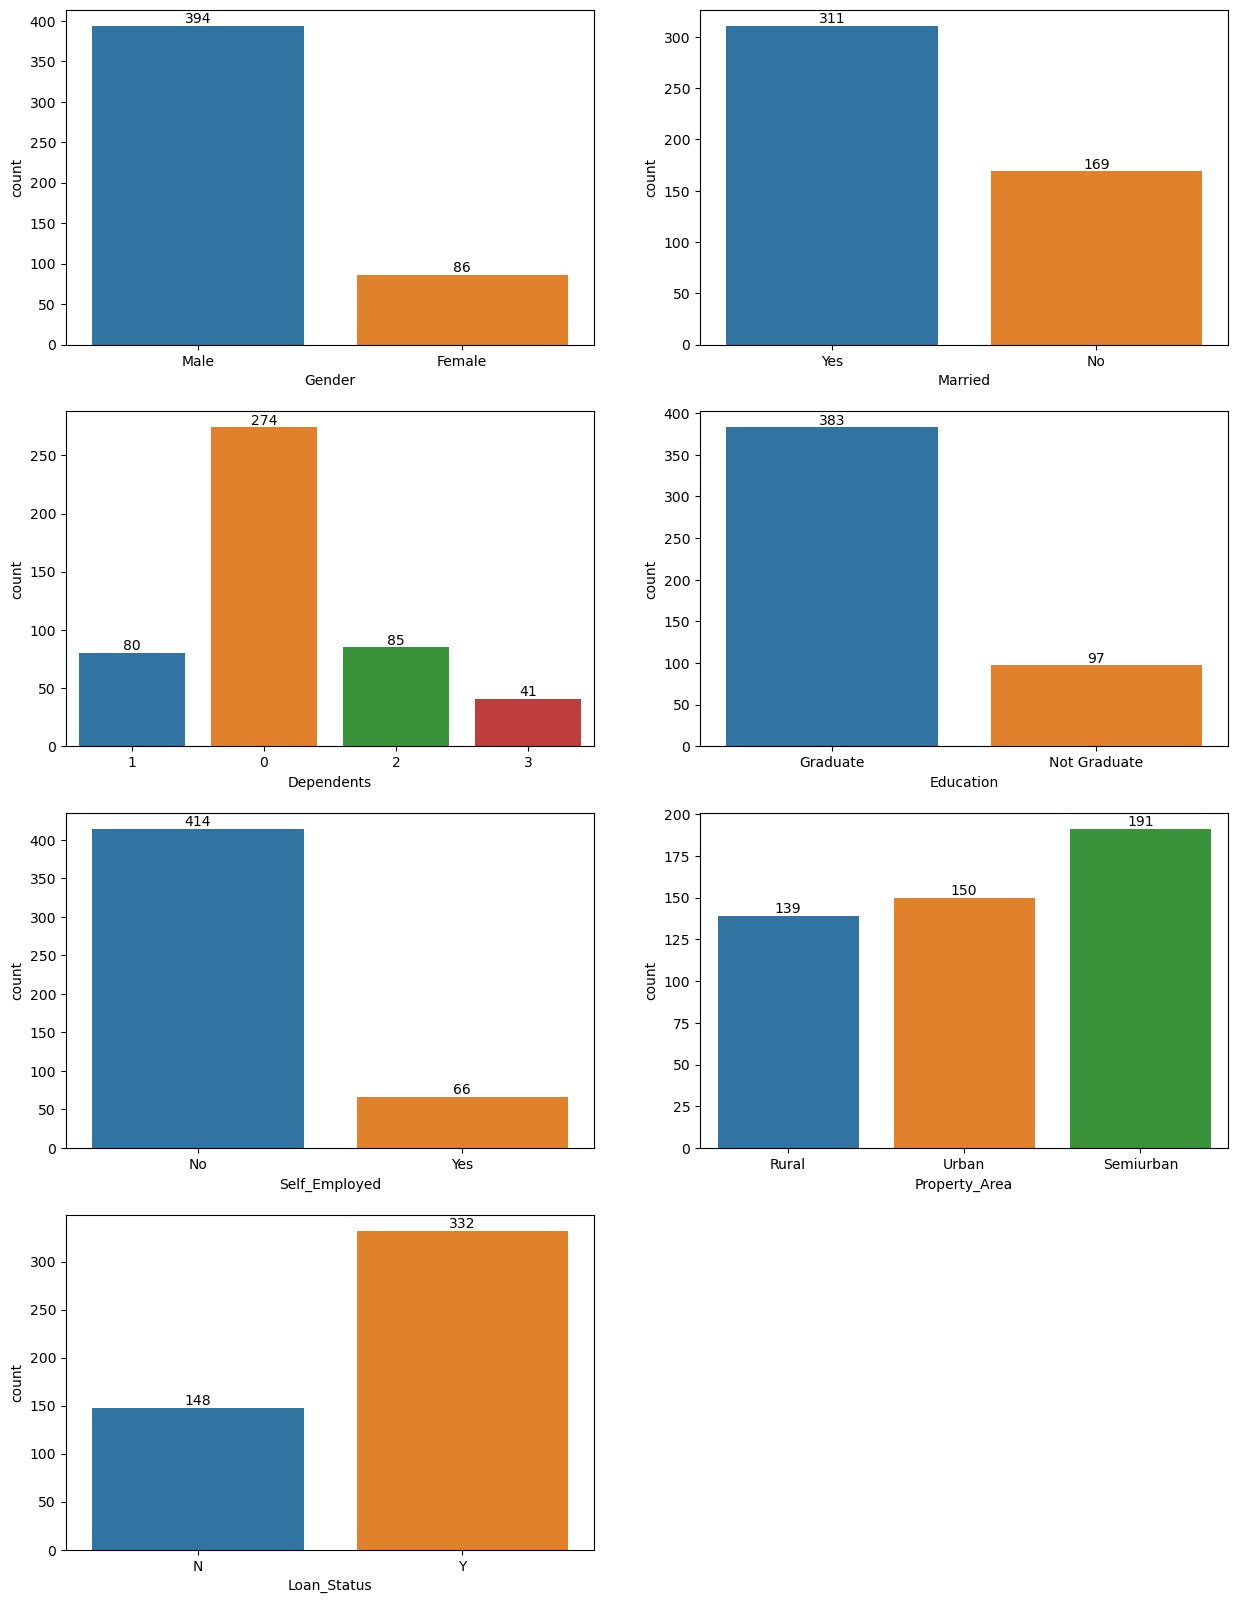

In [17]:
plt.figure(figsize=(15,20))
for i,column in enumerate(train_categorical_columns[1:]):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(data=train_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

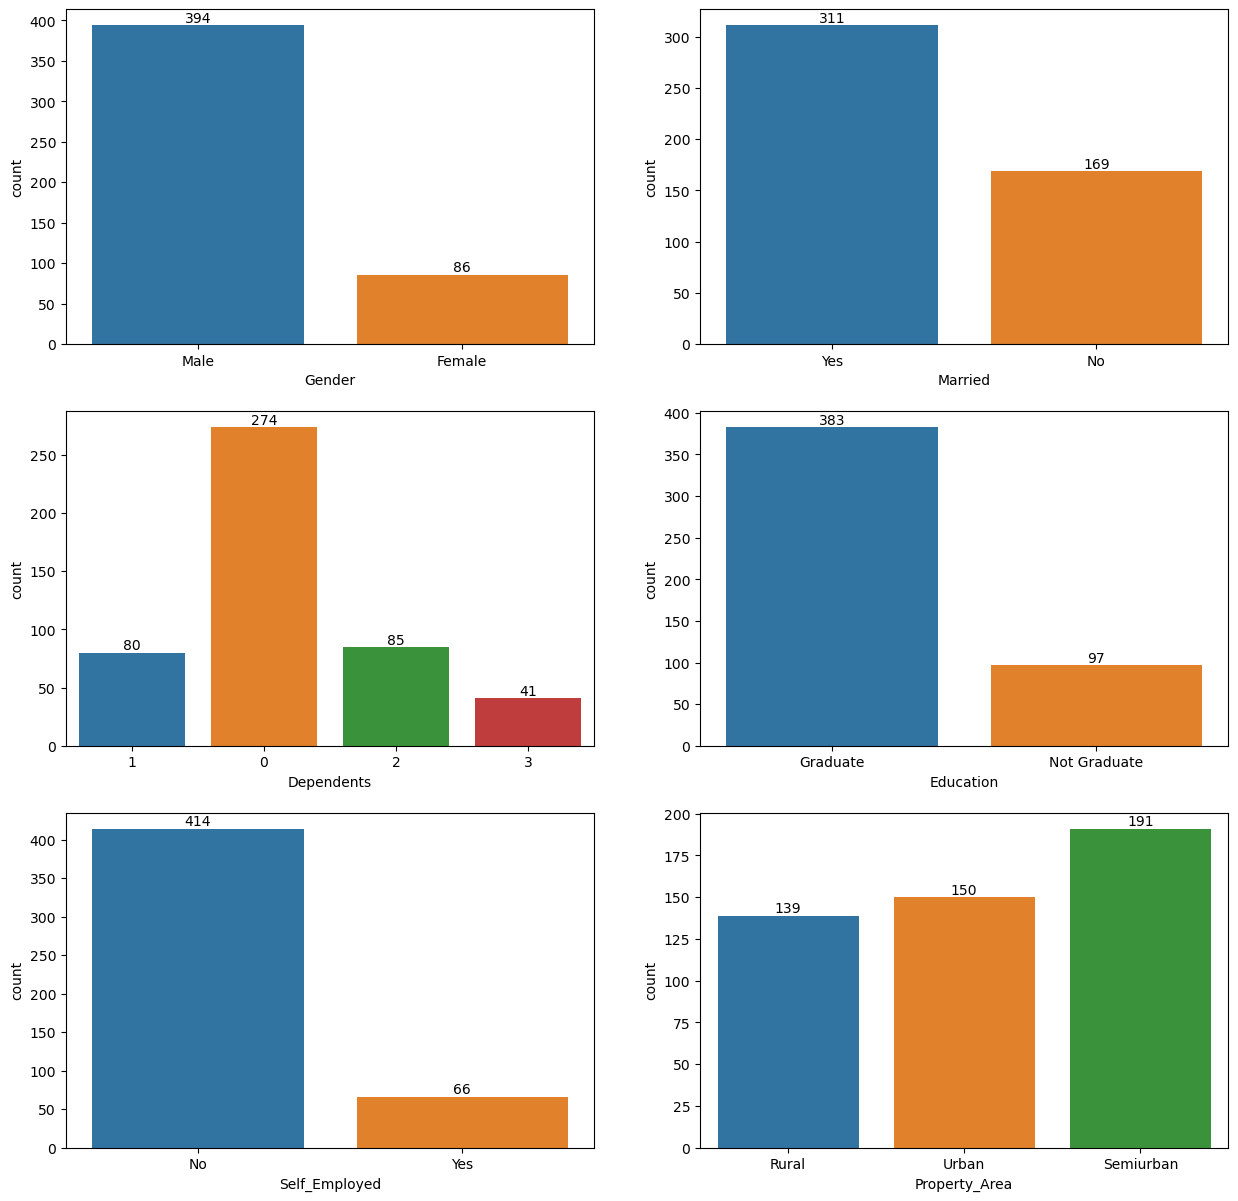

In [18]:
#working on test data categorical columns
plt.figure(figsize=(15,20))
for i,column in enumerate(test_categorical_columns[1:]):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(data=train_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#working on the numericaL data on train data set

In [19]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


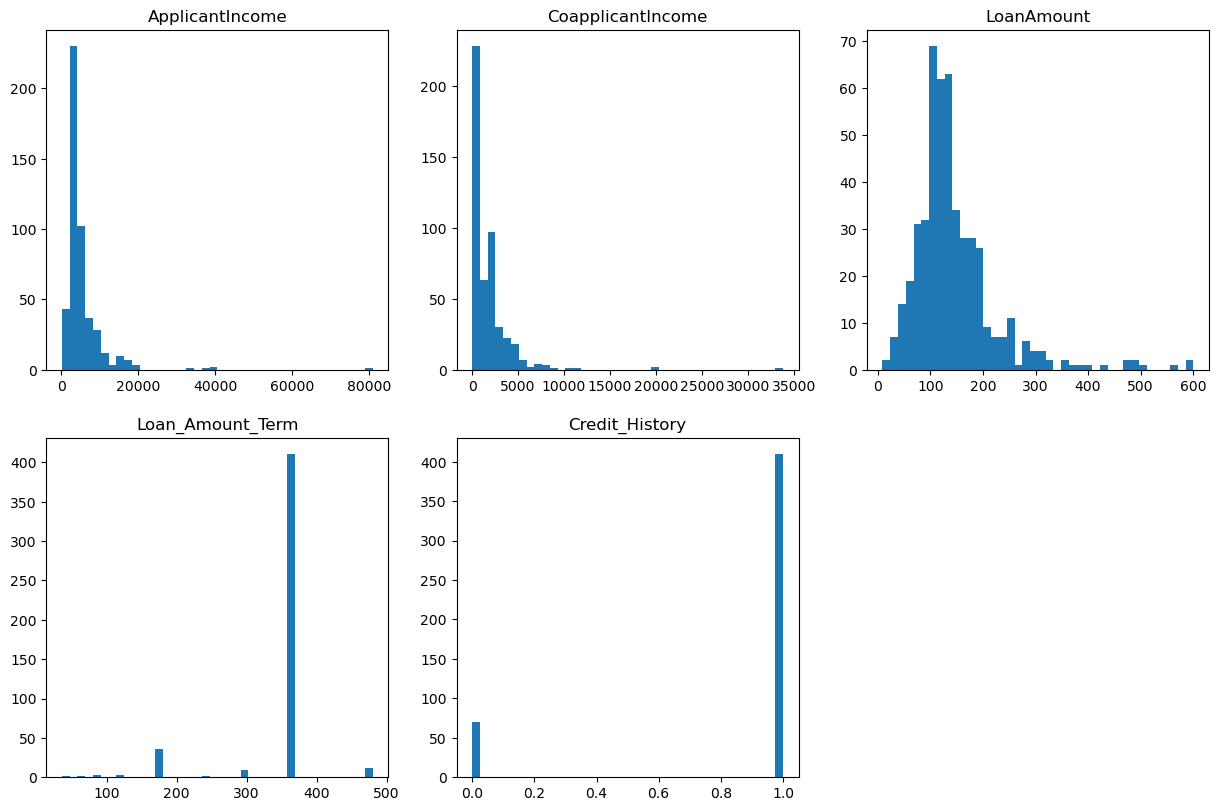

In [20]:
plt.figure(figsize=(15,15))
for index,i in enumerate(train_numerical_columns):   
    plt.subplot(3,3,index+1)
    plt.title(i)
    plt.hist(train_df[i],bins=40)

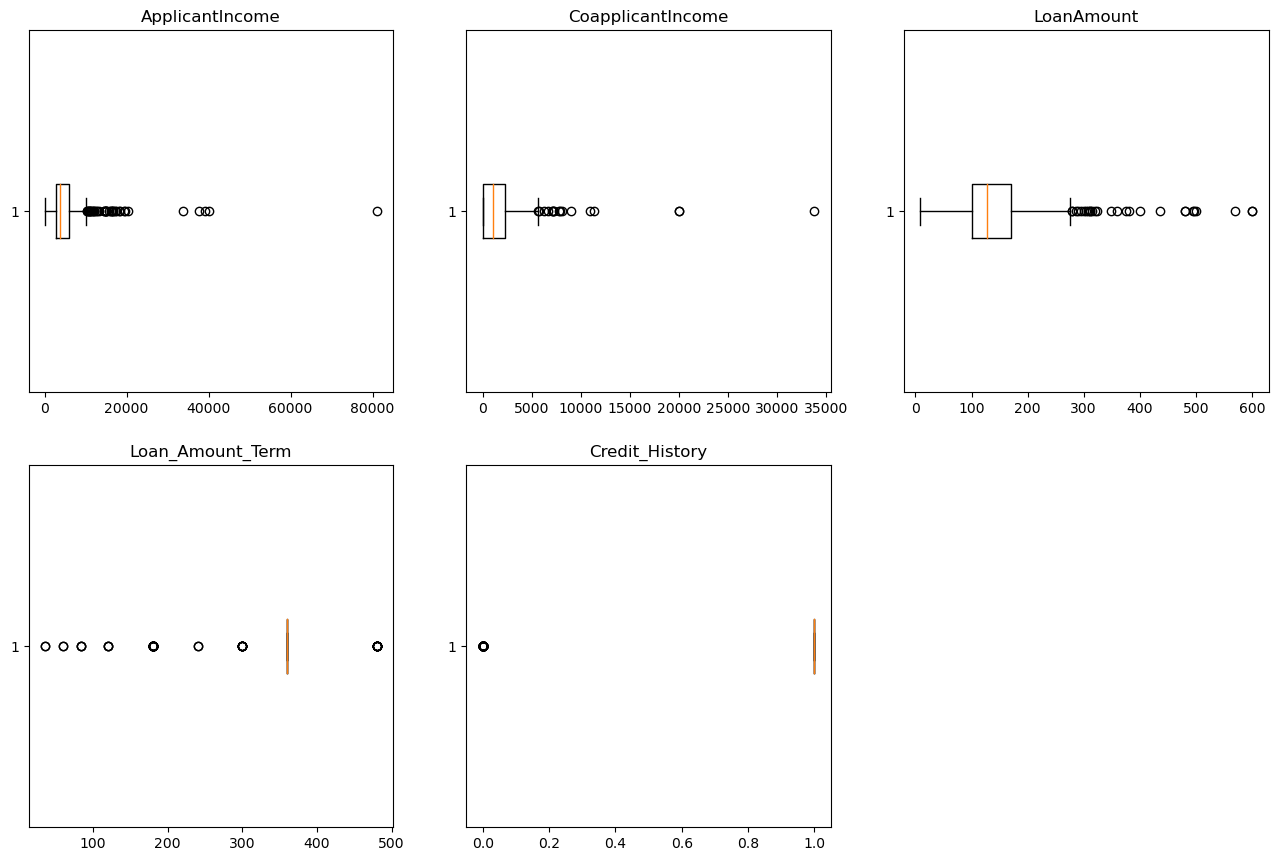

In [21]:
plt.figure(figsize=(16,16))
for index,i in enumerate(train_numerical_columns):   
    plt.subplot(3,3,index+1)
    plt.title(i)
    plt.boxplot(train_df[i],vert=False)

In [22]:
#finding the outliers...............
for index,i in enumerate(train_numerical_columns[:3]):
    q1=np.percentile(train_df[i],25)
    q2=np.percentile(train_df[i],50)
    q3=np.percentile(train_df[i],75)
    iqr=q3-q1
    upper_bound=q3+1.5*(iqr)
    lower_bound=q1-1.5*(iqr)
    a=train_df[i]>upper_bound
    b=train_df[i]<lower_bound
    c=a|b
    k=len(train_df[i][c])
    print("the outliers in {} column is {}".format(i,k))
    print(upper_bound)
    print(lower_bound)

the outliers in ApplicantIncome column is 40
10283.125
-1531.875
the outliers in CoapplicantIncome column is 17
5633.125
-3379.875
the outliers in LoanAmount column is 27
275.0
-5.0


In [23]:
for i in train_numerical_columns[:3]:
    l=[]
    q2=np.percentile(train_df[i],50)
    for j in train_df[i]:
        if (j<lower_bound) or (j>upper_bound):
            l.append(q2)
        else:
            l.append(j)
    train_df[i]=pd.DataFrame(l,columns=[i])

In [24]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


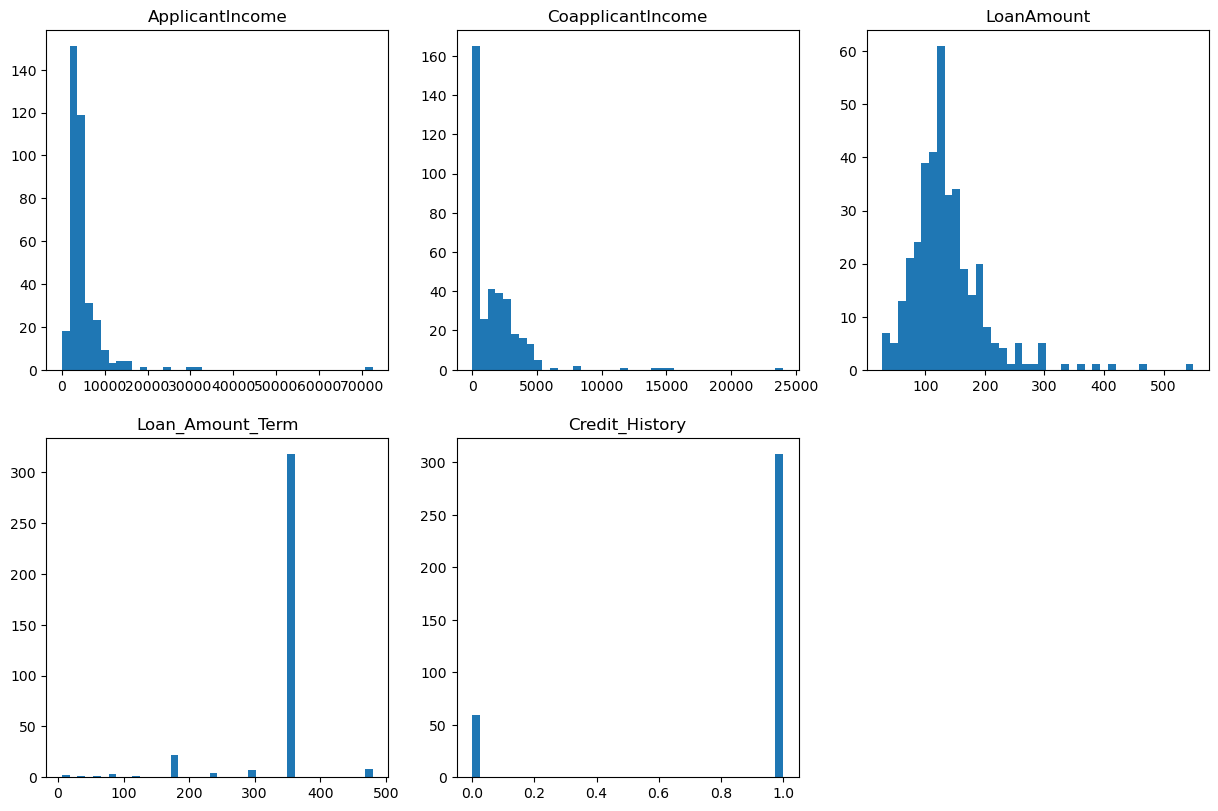

In [25]:
plt.figure(figsize=(15,15))
for index,i in enumerate(test_numerical_columns):   
    plt.subplot(3,3,index+1)
    plt.title(i)
    plt.hist(test_df[i],bins=40)

In [26]:
for index,i in enumerate(test_numerical_columns[1:3]):
    q1=np.percentile(test_df[i],25)
    q2=np.percentile(test_df[i],50)
    q3=np.percentile(test_df[i],75)
    iqr=q3-q1
    upper_bound=q3+1.5*(iqr)
    lower_bound=q1-1.5*(iqr)
    a=test_df[i]>upper_bound
    b=test_df[i]<lower_bound
    c=a|b
    k=len(test_df[i][c])
    print("the outliers in {} column is {}".format(i,k))

the outliers in CoapplicantIncome column is 8
the outliers in LoanAmount column is 18


In [27]:
#loan_df.drop(Credit_History,axis=1)
corr_data=train_df.corr(numeric_only=True)
corr_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.042007,-0.004513,-0.012590,-0.018879
CoapplicantIncome,-0.042007,1.000000,0.105626,0.012248,0.000108
LoanAmount,-0.004513,0.105626,1.000000,0.084839,-0.011838
Loan_Amount_Term,-0.012590,0.012248,0.084839,1.000000,0.032937
Credit_History,-0.018879,0.000108,-0.011838,0.032937,1.000000


<Axes: >

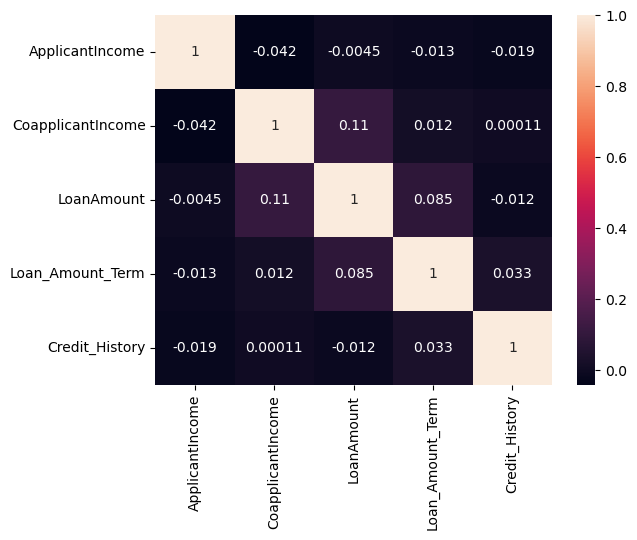

In [28]:
sns.heatmap(corr_data,annot=True)

In [29]:
#loan_df.drop(Credit_History,axis=1)
corr_data=test_df.corr(numeric_only=True)
corr_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.488737,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150034,-0.008633,-0.058004
LoanAmount,0.488737,0.150034,1.000000,0.091867,-0.012932
Loan_Amount_Term,0.023319,-0.008633,0.091867,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.012932,-0.048189,1.000000


<Axes: >

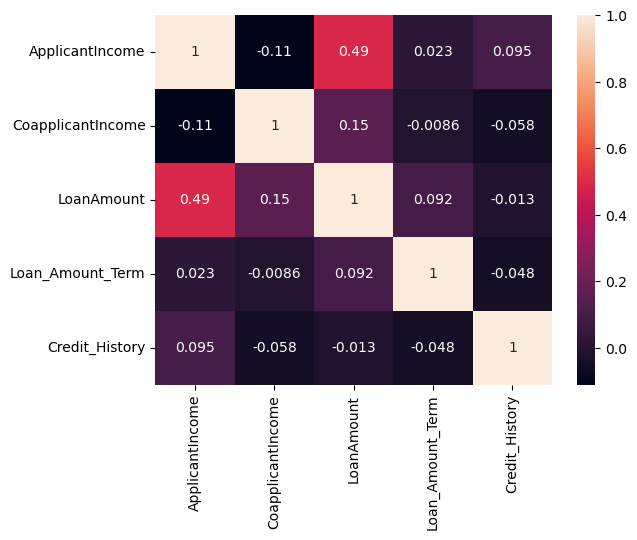

In [30]:
sns.heatmap(corr_data,annot=True)

In [ ]:
#converting the cat to numerical in the train data

In [31]:
from sklearn.preprocessing import LabelEncoder
for i in train_categorical_columns:
    LE=LabelEncoder()
    train_df[i]=LE.fit_transform(train_df[i])

In [ ]:
#converting the cat to num in the test data

In [32]:
from sklearn.preprocessing import LabelEncoder
for i in test_categorical_columns:
    LE=LabelEncoder()
    test_df[i]=LE.fit_transform(test_df[i])

In [33]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [34]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,3859.0,1084.5,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3859.0,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0,1,0,3859.0,1084.5,120.0,360.0,1.0,2,1
3,3,1,0,0,0,0,3859.0,0.0,141.0,360.0,1.0,2,1
4,4,1,1,2,0,1,3859.0,1084.5,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,0,0,0,0,0,3859.0,0.0,71.0,360.0,1.0,0,1
476,476,1,1,3,0,0,3859.0,0.0,40.0,180.0,1.0,0,1
477,477,1,1,1,0,0,3859.0,240.0,253.0,360.0,1.0,2,1
478,478,1,1,2,0,0,3859.0,0.0,187.0,360.0,1.0,2,1


In [35]:
#remove the id column
train_df=train_df.drop("Loan_ID",axis=1)

In [36]:
#test data remove id column
test_id=test_df["Loan_ID"]
test_id

0        0
1        1
2        2
3        3
4        4
      ... 
362    362
363    363
364    364
365    365
366    366
Name: Loan_ID, Length: 367, dtype: int32

In [37]:
test_df=test_df.drop("Loan_ID",axis=1)

In [38]:
#model devlepoment
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
#without hyperpatrameters

In [39]:
X=train_df.drop("Loan_Status",axis=1)
y=train_df["Loan_Status"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

y_pred_log=logtree.predict(X_test)
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 80.21
F1 is: 0.88
Precision is: 0.81
Recall is: 0.96


In [ ]:
#with hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=LogisticRegression() 

In [41]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

In [42]:
grid_search = GridSearchCV(grid_RF,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

In [43]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [44]:
best_params=grid_search.best_params_

In [45]:
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [46]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
logtree.fit(X_train, y_train)

y_pred_log=logtree.predict(X_test)
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 81.25
F1 is: 0.89
Precision is: 0.81
Recall is: 0.97


In [47]:
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [48]:
import pickle
pickle.dump(logtree,open("log_tree","wb"))

In [49]:
log=pickle.load(open("log_tree","rb"))

In [50]:
y_pred=log.predict(test_df)

In [51]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [52]:
prediction_df=pd.DataFrame(y_pred,columns=['Loan_Status'])
prediction_df

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [53]:
predictions = pd.concat([test_data_id,prediction_df],axis = 1)
predictions

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [54]:
data=predictions['Loan_Status']==1
predictions['Loan_Status']=np.where(data,'Y','N')

In [55]:
predictions.to_csv("my_prediction.csv",index=False)

In [56]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

In [57]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 81.25
F1 is: 0.89
Precision is: 0.81
Recall is: 0.97


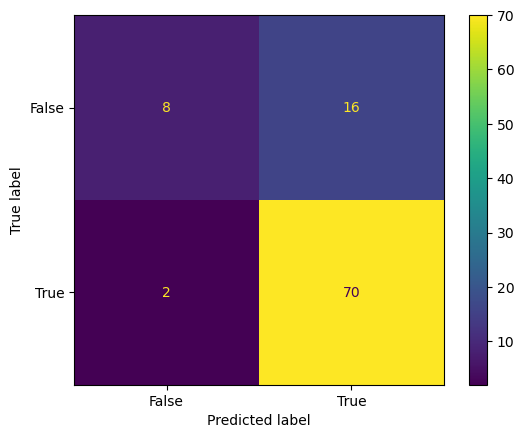

True negative: 8
False postive: 16
False negative: 2
True postive: 70


In [58]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

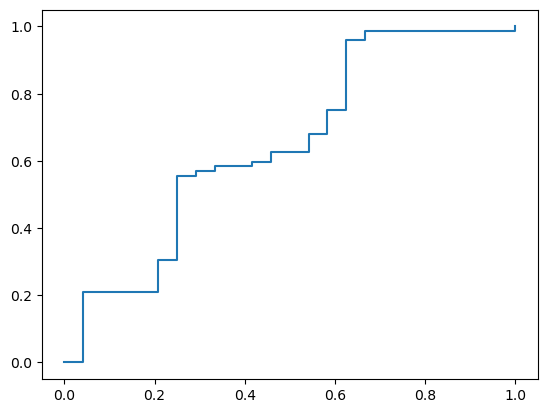

In [59]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [60]:
#accuracy on training data
X_train_prediction = logtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.8046875

In [61]:
#accuracy on test data
X_test_prediction = logtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test) 
test_data_accuracy

0.8020833333333334

In [62]:
classification_report(y_test,y_pred_log)

'              precision    recall  f1-score   support\n\n           0       0.80      0.33      0.47        24\n           1       0.81      0.97      0.89        72\n\n    accuracy                           0.81        96\n   macro avg       0.81      0.65      0.68        96\nweighted avg       0.81      0.81      0.78        96\n'